In [20]:
from aldiscore.scoring.pairwise import DPosDistance
from aldiscore.datastructures.alignment import Alignment
from aldiscore.datastructures.ensemble import Ensemble
from aldiscore.scoring import pythia
from Bio import AlignIO
from pathlib import Path
import os
import pandas as pd
import yaml

import seaborn as sn
import matplotlib.pyplot as plt

Process single source 

In [21]:
stats_path = Path(
    "/hits/fast/cme/bodynems/data/test_paper/test_benchout/b1/stats.parquet"
)

stats = pd.read_parquet(stats_path)
stats.query("method == 'dpos'")[["mean"]]
plot_df = stats.reset_index()[["dataset", "mean", "datatype", "method"]]
plot_df = plot_df.pivot(index=["dataset", "datatype"], columns="method", values="mean")
plot_df = plot_df.reset_index()
plot_df

method,dataset,datatype,dpos,pythia
0,s1,AA,0.067253,NaN
1,s2,AA,0.129453,NaN


Text(0.5, 0, 'Value')

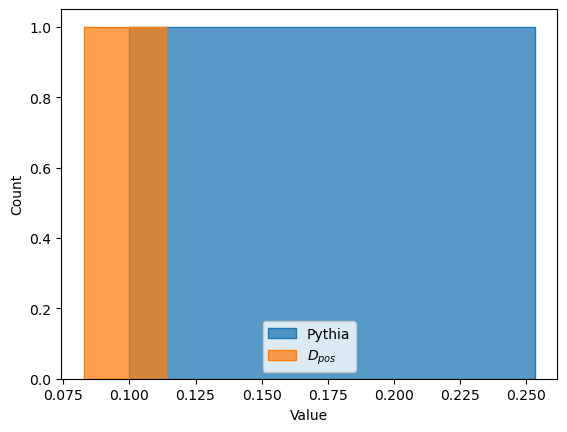

In [13]:
fig = plt.figure()
sn.histplot(plot_df, x="pythia", element="poly", label="Pythia")
sn.histplot(plot_df, x="dpos", element="poly", label="$D_{pos}$")
plt.legend()
plt.xlabel("Value")

In [ ]:
plot_df
# fig = plt.figure()
# sn.histplot(plot_df, x="pythia", element="poly", label="Pythia")
# sn.histplot(plot_df, x="dpos", element="poly", label="$D_{pos}$")
# plt.legend()
# plt.xlabel("Value")

sn.kdeplot(
    plot_df, x="dpos", y="pythia", hue="datatype", fill=True, alpha=0.7, bw_adjust=0.2
)

Process multiple sources 

In [22]:
sources = ["b1", "b2"]
dfs = []
for source in sources:
    stats_path = Path(
        f"/hits/fast/cme/bodynems/data/test_paper/test_benchout/{source}/stats.parquet"
    )

    dfs.append(pd.read_parquet(stats_path))

stats = pd.concat(dfs)
stats.query("method == 'dpos'")[["mean"]]
plot_df = stats.reset_index()[["source", "dataset", "mean", "datatype", "method"]]
plot_df = plot_df.pivot(
    index=["source", "dataset", "datatype"], columns="method", values="mean"
)
plot_df = plot_df.reset_index()
plot_df

method,source,dataset,datatype,dpos,pythia
0,b1,s1,AA,0.067253,NaN
1,b1,s2,AA,0.129453,NaN
2,b2,s3,AA,0.067220,NaN
3,b2,s4,AA,0.126850,NaN


In [4]:
from ensemblify.utils import infer_data_type

raxml_path = yaml.safe_load(open("../configs/general.yaml", "r"))["general"]["raxml"]
raxml_path = Path(raxml_path)
ens_dir = Path("/hits/fast/cme/bodynems/data/paper/treebase_v1/26669_21.phy/ensemble")
alignments = []
for msa_file in os.listdir(ens_dir):
    alignment = Alignment(AlignIO.read(ens_dir / msa_file, "fasta"))
    alignments.append(alignment)

ensemble = Ensemble(alignments)
print(infer_data_type(ensemble.dataset.records))
measure = DPosDistance(format="matrix")
score = measure.compute(ensemble)
print(score.round(2))

phylo = pythia.compute_pythia_difficulty(ensemble, raxml_path)
phylo
# AlignIO.read()

DNA


KeyboardInterrupt: 